## Tarea 7 - FIS1344: Agustin Ibarra Sepúlveda.

Intente escribir su propia versión del método de Newton, haciéndola lo más rápida posible. Luego compare el tiempo que tarda en resolver el ejemplo de clase (el cero de la función  f(x)=x−cos(x) ) con el tiempo que tarda el método de Newton que se encuentra en scipy.

-------------------------------------------------------------------------------------------------------------------------------

## Desarrollo 

Primero lo que haremos para desarrollar mi versión de método de newton, no escribiremos la derivada tal cual, lo que haremos es usar las aproximaciones vistas en clases para la derivada, en especial la derivada de 3 puntos. Comenzaremos escribiendo la derivada en 3 puntos con la primera función, esta nos acompañará en la función newton que realizaremos. Para la función de newton seguiremos los mismos pasos que los de la clase, pero haremos unos cambiamos, sobre todo que trataremos pedir una máxima de iteraciones. 

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [98]:
def deriv3p(f, x, h):
    return (-3*f(x) + 4*f(x + h) - f(x + 2*h))/(2*h)
#Esta funcion nos dara la derivada en 3 puntos. 

def Newton(f, x0, itermax, tol, h):
    '''
    Función de Newton que toma una función, un punto inicial, 
    un número de iteraciones que se espera, la tolerancia y 
    el error esperado.

    Esta función necesita la función hace uso de la función
    deriv3p(f, x, h), la cual es la derivada de la función usada,
    en 3 puntos. 

    Newton(f, x0, itermax, tol, h).
    f: Función
    x0: Punto inicial
    itermax: Iteraciones máximas
    tol: Tolerancia
    h: Error estimado en la medición
    '''
    df = deriv3p(f, x0, h) #Derivada en 3 puntos.
    x0 = x0 - (f(x0)/df) #Metodo de newton.
    i = 1 #Contador para el numero de iteraciones. 
    while (i<=itermax) and abs(x0)>tol:
        i = i+1 #Aumentamos el contador para las iteraciones que queremos. 
        df = deriv3p(f, x0, h)
        x0 = x0 - (f(x0)/df) #Realizamos de nuevo metodo de newton 
    return x0, i             #con la nueva variable x0

Ahora definimos la función que queremos encontrarle el 0, por lo que la definiremos sencillamente y aprovecharemos de graficar.

Text(0.5, 1.0, 'Función f(x)')

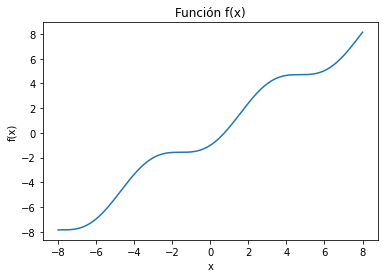

In [88]:
def funcion(x):
    return x-np.cos(x)
x = np.linspace(-8, 8, 1000)
plt.plot(x, funcion(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función f(x)')

In [92]:
Newton(funcion, 0.2, 4, 10**(-3), 0.001)

(0.7390851332151607, 5)

In [94]:
from scipy import optimize

sol = optimize.root_scalar(funcion, x0=0.2, fprime=fprime, method='newton')

sol.root, sol.iterations

(0.7390851332151607, 5)

Como se puede apreciar, el código que creamos con la derivada a 3 puntos, es idéntico al resultado de scipy. Con esto, aunque sean iguales, calculemos el tiempo la cual se demora, mi función y la otra.

------------------------------------------------------------------------

## Tiempo de ejecución

Para calcular el tiempo, usaremos la librería time, el cual calcularemos la diferencia del tiempo inicial y final con que termina el código. Así nos dará un resultado en segundos, que será el tiempo que se demoró la función en dar el resultado.

In [93]:
inicio = time.time()

Newton(funcion, 0.2, 4, 10**(-3), 0.001)

fin = time.time()
print(fin-inicio) 

0.00853276252746582


In [96]:
inicio = time.time()

optimize.root_scalar(funcion, x0=0.2, fprime=fprime, method='newton')

fin = time.time()
print(fin-inicio)

0.0010254383087158203


Ahora, como se ve en los tiempos, mi código se demora mucho más de lo que se demora el código de scipy, aún asó, ambos son pequeños comparados al segundo. Podemos concluir entonces que el código de scipy es mucho más eficiente que el que realice.